# Exercise 2
Coursera - Machine Learning <br>
Andrew Ng

# Regularized Logistic Regression

## Visualizing the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as dframe

In [2]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

In [3]:
X = data[:, :2];
y = data[:, 2]

In [4]:
y.shape

(118,)

In [5]:
pos = np.argwhere(y==1)
neg = np.argwhere(y==0)

In [6]:
pos.shape, neg.shape

((58, 1), (60, 1))

In [7]:
adm = X[pos, :2].reshape(-1, 2)
not_adm = X[neg, :2].reshape(-1, 2)

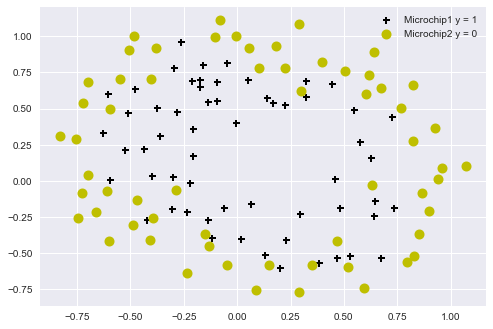

In [8]:
plt.style.use('seaborn')
admit = plt.scatter(adm[:, 0], adm[:, 1], marker='+', color='k', linewidths=2)
not_admit = plt.scatter(not_adm[:, 0], not_adm[:, 1], marker='o', color='y', linewidths=3)
plt.legend((admit, not_admit), ["Microchip1 y = 1", "Microchip2 y = 0"])
plt.show()

## Feature Mapping 

In [9]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones([X1.size, 1])
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp = (X1**(i-j)*(X2**j))[:, np.newaxis]
#             out(:, end+1) = (X1.^(i-j)).*(X2.^j);
            out = np.hstack([out, temp])
    
    return out

In [10]:
X = mapFeature(X[:, 0], X[:, 1])

In [11]:
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X.shape

(118, 28)

## Cost function and gradient
Recall that regularized cost function in logistic regression is
![cost_funct_reg](./img/cost_funct_reg.JPG)
  
The gradient cost function is vector where the $j^{th}$ element is defined as follows
![cost_funct_reg_j0](./img/grad_descent_reg_j0.JPG)
![cost_funct_reg_j1](./img/grad_descent_reg_j1.JPG)

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

In [13]:
# Set regularization parameter lambda to 1
λ = 1

In [14]:
# Sigmoid function
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [15]:
def costFunctionReg(theta, X, y, λ):
    # Initialize some useful values
    m = X.shape[0]; # number of training examples

    # You need to return the following variables correctly 
    J = 0;
    grad = np.zeros([theta.size]);
    
    # Sigmoid
    z = X@theta
    g_z = sigmoid(z)
    
    # Cost function
    J = 1/m * np.sum([(-y * np.log(g_z))-(1-y)*(np.log(1-g_z))]) + (λ/(2*m) * np.sum(theta[1:]**2))
    
    # Grad descent
    grad = 1/m * X.T @ (g_z - y);
    grad[1:] = grad[1:] + (λ/m * theta[1:])
    
    return J, grad

In [16]:
cost, grad = costFunctionReg(initial_theta, X, y, λ)

In [17]:
print('Cost at initial theta (zeros): %f' %cost)
print('Expected cost(approx): 0.693')
print('\n')
print('Gradient at initial theta (zeros) - first five values only:')
for i in grad[:5]:
    print('{:.5f}'.format(i))
print('')
print('Expected gradients (approx) - first five values only:\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost(approx): 0.693


Gradient at initial theta (zeros) - first five values only:
0.00847
0.01879
0.00008
0.05034
0.01150

Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [18]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones([X.shape[1]])
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

In [19]:
print('Cost at initial theta (zeros): %f', cost);
print('Expected cost (approx): 3.16\n');

print('Gradient at initial theta (zeros) - first five values only:');
for i in grad[:5]:
    print('{:.5f}'.format(i))
print('')
print('Expected gradients (approx) - first five values only:');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922');

Cost at initial theta (zeros): %f 3.1645093316150095
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
0.34605
0.16135
0.19480
0.22686
0.09219

Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


### Learning parameters using $fminunc$ 

In [20]:
import scipy.optimize as opt

In [21]:
# to change the behaviour of numpy's division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [22]:
# Initialize theta and lambda
initial_theta = np.zeros([X.shape[1]])
λ=1

In [23]:
initial_theta.ndim

1

In [24]:
# fmin_tnc will return tuple with first element is the optimized theta
result = opt.fmin_tnc(func=costFunctionReg, 
                      x0=initial_theta.flatten(),
                      args=(X, y.flatten(),  λ))

In [25]:
# The theta returned by fmin_tnc is the first element of result
theta = result[0]
theta

array([ 1.27271028,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.43166931,  0.12393227, -0.36553117, -0.35725402, -0.17516291,
       -1.45817011, -0.05098418, -0.61558546, -0.27469166, -1.19271297,
       -0.24217839, -0.20603291, -0.04466178, -0.27778956, -0.29539513,
       -0.45645981, -1.04319157,  0.02779373, -0.29244878,  0.01555762,
       -0.32742408, -0.14389151, -0.92467486])

In [26]:
theta.shape

(28,)

## Plotting Decision Boundary

In [27]:
'''
This mapFeature function is different than the previous one, was made to be compatible with plotDecisionBoundary function
'''
def mapFeaturePlot(X1, X2):
    degree = 6
    out = np.ones([X1.size])
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp = (X1**(i-j)*(X2**j))
            out = np.hstack([out, temp])
    
    return out

In [28]:
def plotDecisionBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((u.size, v.size))
    
    for i in range(0, u.size):
        for j in range(0, v.size):
            z[i, j] = mapFeaturePlot(u[i], v[j])@theta
    
    X, Y = np.meshgrid(u, v)
    admit = plt.scatter(adm[:, 0], adm[:, 1], marker='+', color='k', linewidths=2)
    not_admit = plt.scatter(not_adm[:, 0], not_adm[:, 1], marker='o', color='y', linewidths=3)
    plt.legend((admit, not_admit), ["Microchip1 y = 1", "Microchip2 y = 0"])
    plt.show()
    
    return z

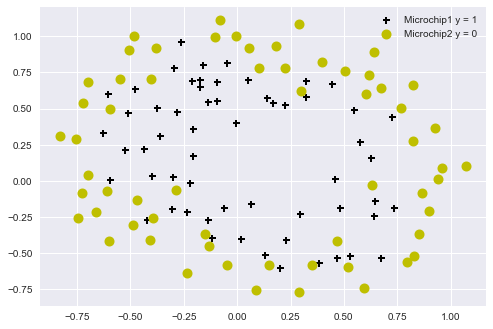

In [29]:
Z = plotDecisionBoundary(theta, X, y)

In [30]:
X.shape

(118, 28)

In [31]:
theta.shape

(28,)

In [32]:
z = X@theta

In [33]:
z.shape

(118,)

In [34]:
# Compute accuracy on our training set
def predict(theta, X):
    m = X.shape[0] # Number of training examples
    p = np.zeros([m]);
    
    # Instructions: Complete the following code to make predictions using
    # your learned logistic regression parameters. 
    # You should set p to a vector of 0's and
    
    p = sigmoid(X @ theta)
    
    for i in range(m):
        if p[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    return p

In [35]:
p = predict(theta, X)

In [36]:
acc = (np.sum(y == p)/y.size)*100

In [37]:
print('Train Accuracy: %.3f' %acc)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

Train Accuracy: 83.051
Expected accuracy (with lambda = 1): 83.1 (approx)



## Optional (ungraded) exercise